In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mtcar = pd.read_excel('./dataset/MTcars.xlsx')
mtcar.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Problem Statement
- independent varibles are hp and wt
- target is am (a=0 , m =1)


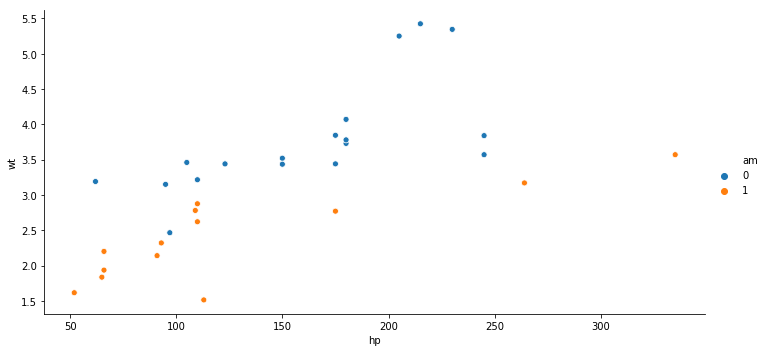

In [4]:
# scatter 
sns.relplot(x='hp',y='wt',kind='scatter',data=mtcar,aspect=2,hue='am')

# Logistic Regression

In [5]:
# GLM
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
mtcar.keys()

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [7]:
model = smf.glm(formula='am~hp+wt',data=mtcar,
                family=sm.families.Binomial()).fit()

In [8]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     am   No. Observations:                   32
Model:                            GLM   Df Residuals:                       29
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5.0296
Date:                Fri, 22 Mar 2019   Deviance:                       10.059
Time:                        18:12:46   Pearson chi2:                     15.0
No. Iterations:                     8   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.8663      7.444      2.535      0.011       4.277      33.455
hp             0.0363      0.018      2.044      0.0

#  $ ln(s) = a + b_1 * x_1 + b_2 *x_2 $ 

> ## $ odds ratio = s = \frac{p}{1-p} $

asuume p = 0.5

$ => s = 1 => ln(1) = 0$

$ 0 = 18.8663 + 0.0363*hp -8.8035*wt $ 

In [9]:
hp = mtcar['hp']
wt = (18.8663+0.0363*hp)/8.8035

In [10]:
wt_sig = 18.8663/8.8035
wt_sig = np.ones(32)*wt_sig

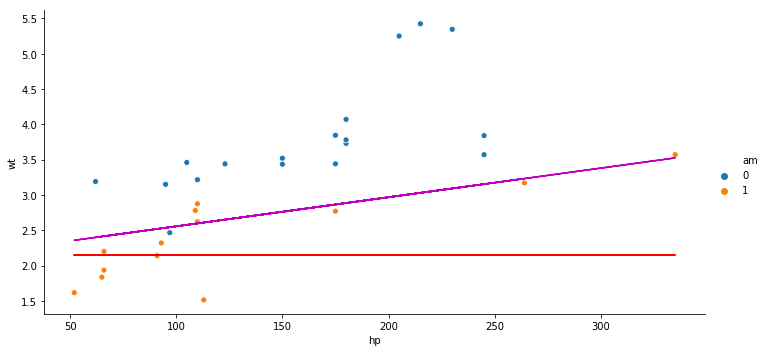

In [11]:
sns.relplot(x='hp',y='wt',kind='scatter',data=mtcar,aspect=2,hue='am')
plt.plot(hp,wt,'m')
plt.plot(hp,wt_sig,'r')

### Splitting data into Training and Testing set
- 80 % training
- 20 % testing

In [12]:
X = mtcar[['hp','wt']]
y = mtcar['am']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((25, 2), (7, 2), (25,), (7,))

In [15]:
train = pd.concat((x_train,y_train),axis=1)
test = pd.concat((x_test,y_test),axis=1)

In [16]:
# logistic regression
model = smf.glm(formula='am~hp+wt',data=train,
                family=sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     am   No. Observations:                   25
Model:                            GLM   Df Residuals:                       22
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.6423
Date:                Fri, 22 Mar 2019   Deviance:                       9.2846
Time:                        18:12:49   Pearson chi2:                     10.2
No. Iterations:                     7   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.0281      7.395      2.167      0.030       1.533      30.523
hp             0.0331      0.017      1.949      0.0

#  $ ln(s) = a + b_1 * x_1 + b_2 *x_2 $ 

> ## $ odds ratio = s = \frac{p}{1-p} $

asuume p = 0.5

$ => s = 1 => ln(1) = 0$

$ 0 = 17.0322 + 0.0349*hp*(0) -7.4346*wt $ 

In [17]:
wt_sig = 17.0322/7.4346
wt_sig = np.ones(32)*wt_sig

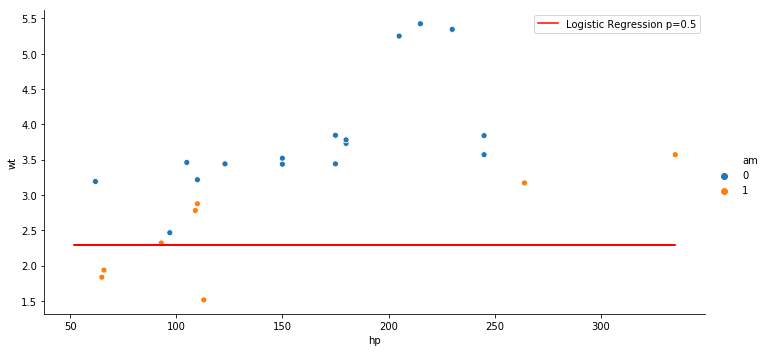

In [18]:
sns.relplot(x='hp',y='wt',kind='scatter',data=train,aspect=2,hue='am')
plt.plot(hp,wt_sig,'r')
plt.legend(['Logistic Regression p=0.5'])

In [19]:
print(model.params)
print(model.pvalues)

Intercept    16.028126
hp            0.033062
wt           -7.054278
dtype: float64
Intercept    0.030210
hp           0.051293
wt           0.018299
dtype: float64


### $ln(s) = model.params['Intercept'] + model.parms['wt']*X $

In [20]:
X = x_test['wt']

In [21]:
def prediction(X):
    lnor = model.params['Intercept'] + model.params['wt']*X
    # convert into array
    oddsratio = np.exp(lnor)
    p = oddsratio/(oddsratio+1)
    return p

In [22]:
y_prob = prediction(X)

In [23]:
x_test.reset_index(inplace=True)
x_train.reset_index(inplace=True)

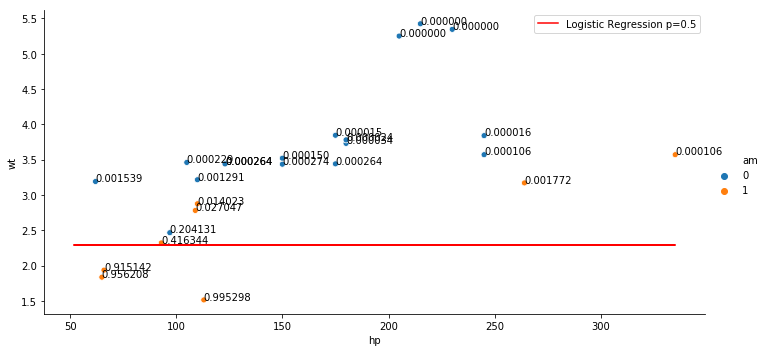

In [27]:
wt_sig = 17.0322/7.4346
wt_sig = np.ones(32)*wt_sig

sns.relplot(x='hp',y='wt',kind='scatter',data=train,aspect=2,hue='am')
plt.plot(hp,wt_sig,'r')
plt.legend(['Logistic Regression p=0.5'])
#print(x_['hp'][1],x_test['wt'][1])
#plt.text(,str(prediction(x_test['wt'][1])))
for i in range(len(x_train)):
    #print(i)
    plt.text(x_train['hp'][i],x_train['wt'][i],"%0.6f"%(prediction(x_train['wt'][i])))
#print(X,y_prob)

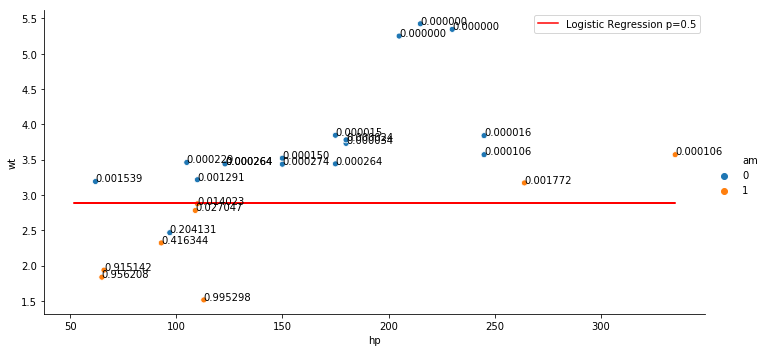

In [29]:
wt_sig = 2.89
wt_sig = np.ones(32)*wt_sig

sns.relplot(x='hp',y='wt',kind='scatter',data=train,aspect=2,hue='am')
plt.plot(hp,wt_sig,'r')
plt.legend(['Logistic Regression p=0.5'])
#print(x_['hp'][1],x_test['wt'][1])
#plt.text(,str(prediction(x_test['wt'][1])))
for i in range(len(x_train)):
    #print(i)"%0.6f"%(prediction(x_train['wt'][i]))
    plt.text(x_train['hp'][i],x_train['wt'][i],"%0.6f"%(prediction(x_train['wt'][i])))
#print(X,y_prob)

In [30]:
y_test

18    1
29    1
0     1
11    0
26    1
8     0
17    1
Name: am, dtype: int64

In [31]:
y_prob = prediction(x_train['hp'])

In [32]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_train,y_prob)

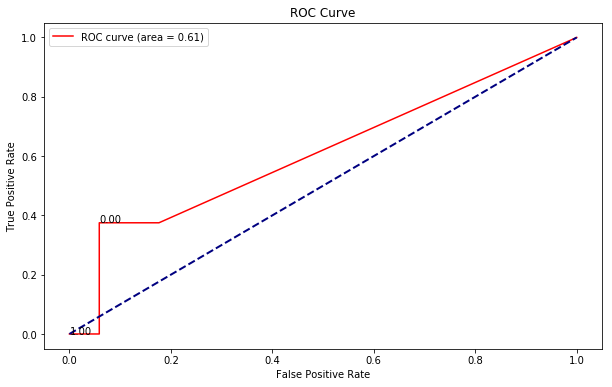

In [33]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()